In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SDSSExtractor import *
from scipy.optimize import curve_fit

### Sizes

[-1.00006278  0.10977318 10.73797214  0.941833  ]


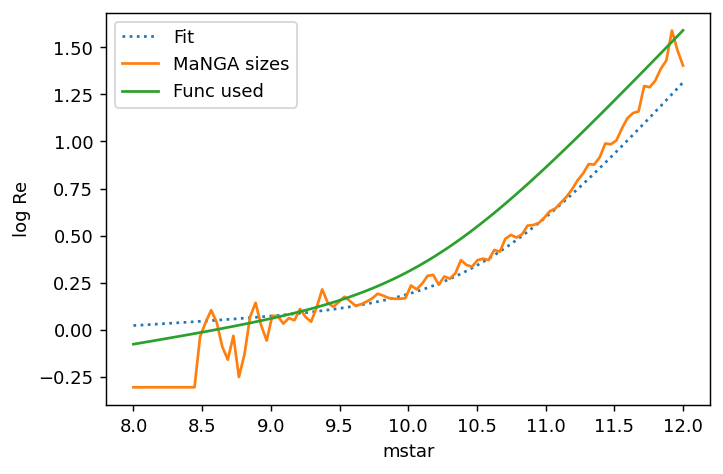

0.04946634322126369 -1.3827633283640057 13.122651401689536 -42.23511756412294


In [12]:
# Fitting

sm = np.linspace(8, 12, 100)
size = np.log10(Assign_Size(sm))

f = np.polyfit(sm, size, 3)

fitted_sizes = f[0] * sm**3 + f[1] * sm **2  + f[2] * sm + f[3] 

plt.figure(dpi=130)
#plt.plot(sm, size)
#plt.plot(sm, fitted_sizes)
plt.plot(sm, np.log10(SDSS_Sizes_Fit(sm, z=0)), ':', label = 'Fit')


manga_sizes = np.log10(Assign_Size(sm, data="MANGa") )

plt.plot(sm, manga_sizes, label = "MaNGA sizes")

smp = 10**(sm)

def test_function(smp, a, b, c, d):
    return (10**a) * (smp**b) * (1 + smp/(10**c))**d
    

res = curve_fit(test_function, smp, 10**manga_sizes)

print(res[0])

res = (10**-0.314) * (smp**0.042) * (1 + smp/(10**10.537))**0.76

plt.plot(sm, np.log10(MANGa_Sizes_Fit(sm)), label = "Func used")

plt.legend()            
plt.xlabel("mstar")
plt.ylabel("log Re")
plt.show()

print(f[0], f[1], f[2], f[3])

In [3]:
def SizesFit(sm, low=0.5, high = 70):
    res = 10**(0.0447320 * sm**3 + \
                -1.255528 * sm **2 + \
                11.994643 * sm + \
                -38.796147)
    res[res < low] = low     
    res[res > high] = high
    return res
   

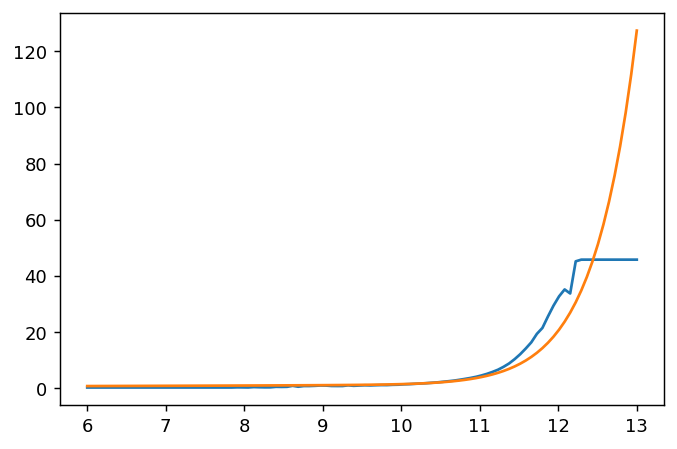

In [4]:
wsm = np.linspace(6, 13, 100)

plt.figure(dpi=130)
plt.plot(wsm, Assign_Size(wsm))
#plt.plot(wsm, 10**(f[0] * wsm**3 + f[1] * wsm **2 + f[2] * wsm + f[3]) )
plt.plot(wsm, SDSS_Sizes_Fit(wsm))
#plt.loglog()
plt.show()

### Sersic Indexes

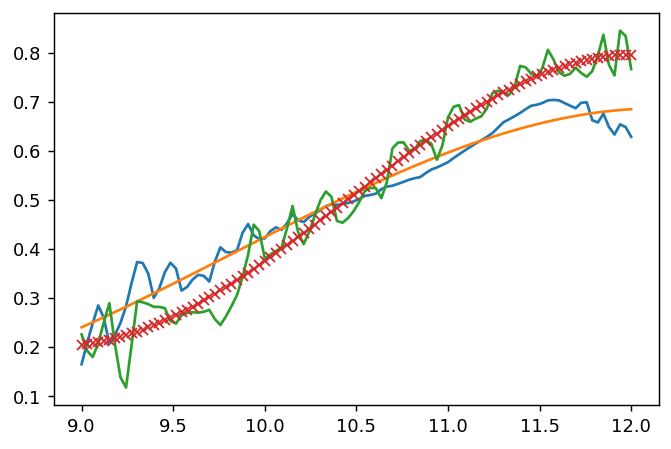

[-3.91336802e-02  1.22667464e+00 -1.25318119e+01  4.21597067e+01]


In [5]:
# Fitting

sm = np.linspace(9, 12, 100)
n = np.log10(AssignSersicIndex(sm))

f = np.polyfit(sm, n, 3)
fitted_n = f[0] * sm**3 + f[1] * sm **2  + f[2] * sm + f[3] 


plt.figure(dpi=130)
plt.plot(sm, n)
plt.plot(sm, fitted_n)


n2 = np.log10(AssignSersicIndex(sm, data="MANGa"))

plt.plot(sm, n2)

f2 = np.polyfit(sm, n2, 3)
fitted_n2 = f2[0] * sm**3 + f2[1] * sm **2  + f2[2] * sm + f2[3] 
plt.plot(sm, fitted_n2, 'x')

plt.show()

print(f2)

In [6]:
def SersicFit(sm, minsm = 8, natmin = 1.6):
    res = 10**(-0.01072867 * sm**3 +\
                0.32824192 * sm**2 +\
               -3.18145729 * sm +\
               10.14652827 )
    res[sm < minsm] = natmin
    return res

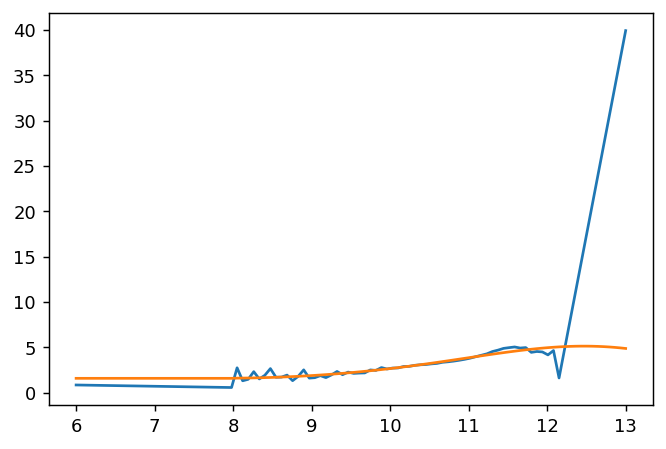

In [7]:
wsm = np.linspace(6, 13, 100)

plt.figure(dpi=130)
plt.plot(wsm, AssignSersicIndex(wsm))
#plt.plot(wsm, 10**(f[0] * wsm**3 + f[1] * wsm **2 + f[2] * wsm + f[3]) )
plt.plot(wsm, SersicFit(wsm))
plt.show()